<a href="https://colab.research.google.com/github/ShijinaS/ICT_Internship/blob/DAY-3/ML_AI_D3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
list=['greeks','for','geeks','is','portal','for','geeks']

df = pd.DataFrame(list)
print(df)


        0
0  greeks
1     for
2   geeks
3      is
4  portal
5     for
6   geeks


In [ ]:
data = pd.read_csv('/content/beer-servings (2) (2).csv')

In [ ]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
data

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,NaN,100.0,3.0,7.7,South America
189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,Yemen,6.0,0.0,0.0,0.1,Asia
191,Zambia,32.0,19.0,4.0,2.5,Africa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 9.2+ KB


In [ ]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [ ]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

fillimg missing values

In [ ]:
num_cols = data[['beer_servings',	'spirit_servings',	'wine_servings',	'total_litres_of_pure_alcohol']]

In [ ]:
num_cols.isna().sum()

beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(num_cols)
num_cols = imputer.transform(num_cols)


In [ ]:
 num_cols = pd.DataFrame(num_cols,columns= [['beer_servings',	'spirit_servings',	'wine_servings',	'total_litres_of_pure_alcohol']])

In [ ]:
num_cols.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [ ]:
data.drop(['beer_servings',	'spirit_servings','wine_servings','total_litres_of_pure_alcohol'],axis=1, inplace=True)

In [ ]:
data.head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [ ]:
data = pd.concat([num_cols,data],axis=1)

In [ ]:
data.head()

,"(beer_servings,)","(spirit_servings,)","(wine_servings,)","(total_litres_of_pure_alcohol,)",country,continent
0,0.0,0.0,0.0,0.0,Afghanistan,Asia
1,89.0,132.0,54.0,4.9,Albania,Europe
2,25.0,0.0,14.0,0.7,Algeria,Africa
3,245.0,138.0,312.0,12.4,Andorra,Europe
4,217.0,57.0,45.0,5.9,Angola,Africa


In [ ]:
data.isna().sum()

(beer_servings,)                   0
(spirit_servings,)                 0
(wine_servings,)                   0
(total_litres_of_pure_alcohol,)    0
country                            0
continent                          0
dtype: int64

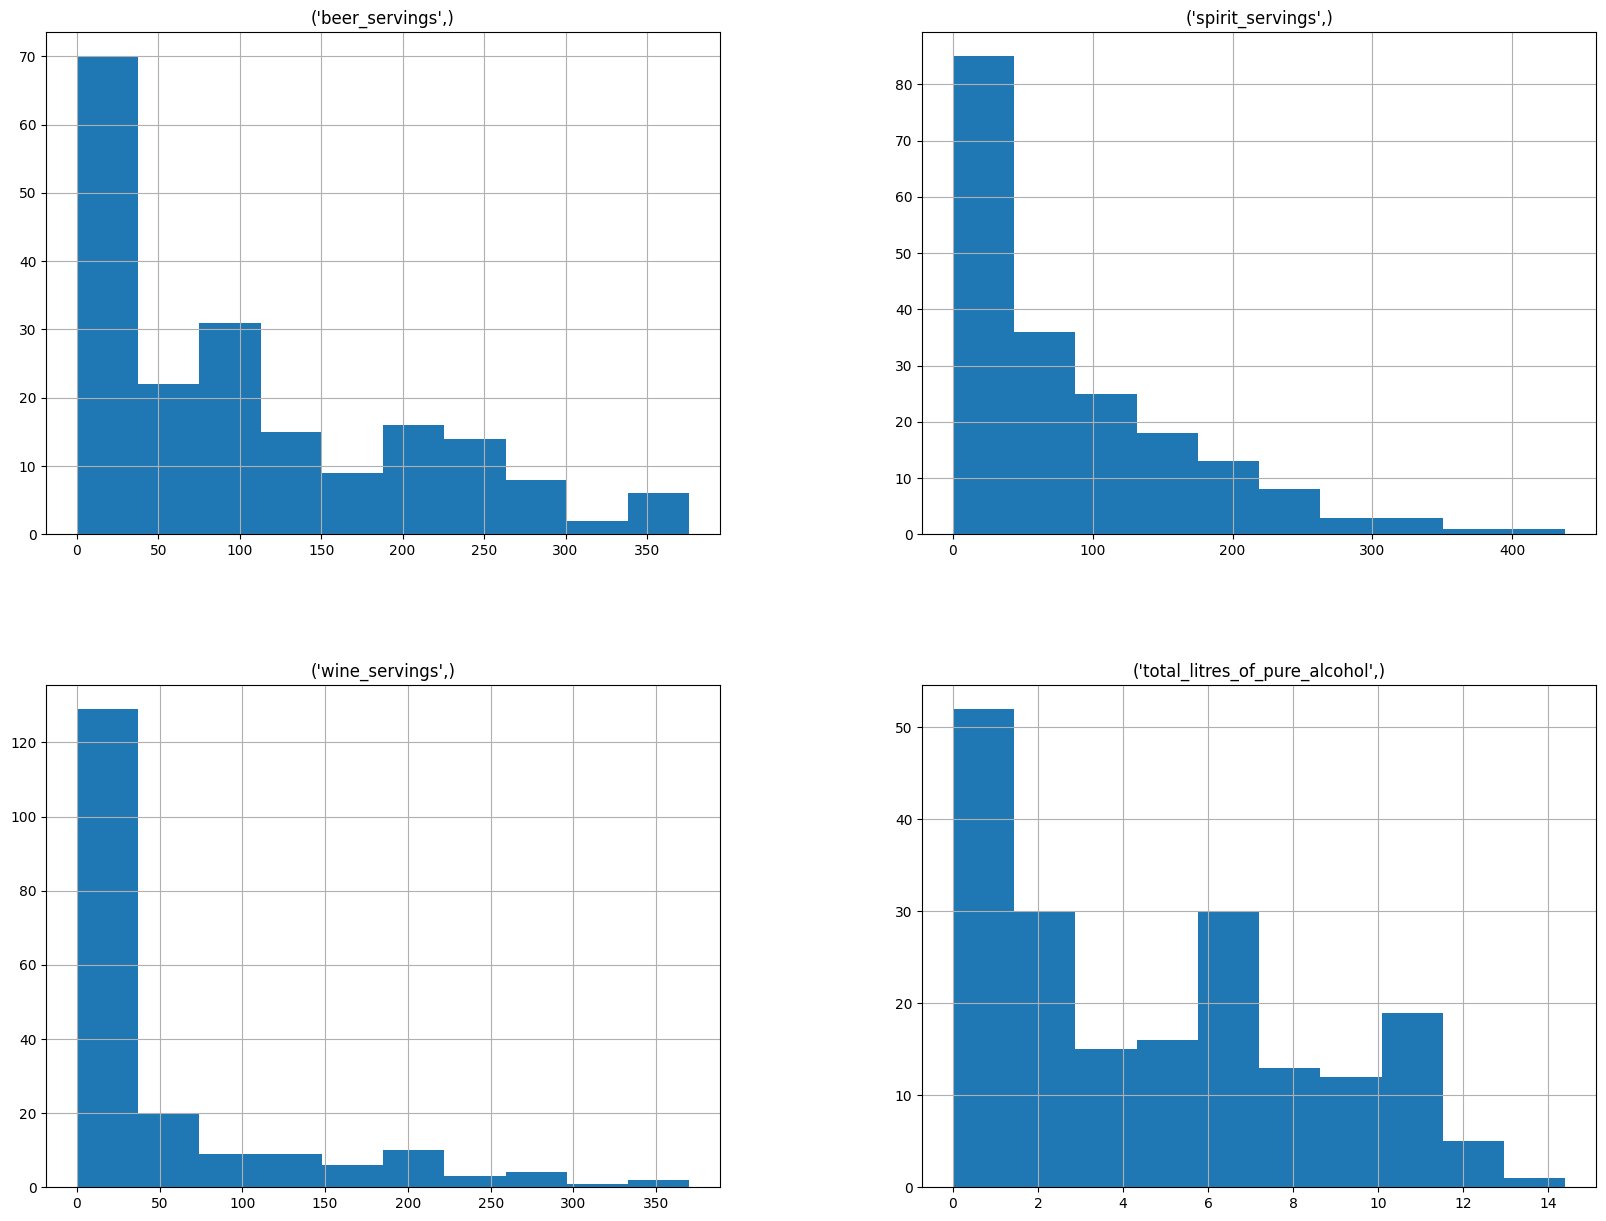

In [ ]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [ ]:
data.columns

Index([               ('beer_servings',),              ('spirit_servings',),
                      ('wine_servings',), ('total_litres_of_pure_alcohol',),
                               'country',                       'continent'],
      dtype='object')

In [ ]:
data = pd.read_csv('/content/beer-servings (2) (2).csv')

In [ ]:
data['beer_servings'] = data['beer_servings'].fillna(data['beer_servings'].median())

In [ ]:
for i in ['spirit_servings','wine_servings','total_litres_of_pure_alcohol']:
  data[i] = data[i].fillna(data[i].median())

In [ ]:
data.isna().sum()

Unnamed: 0                      0
country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [ ]:
data.groupby('continent')['beer_servings'].mean()

continent
Africa            61.471698
Asia              40.613636
Europe           190.822222
North America    145.434783
Oceania           89.687500
South America    137.000000
Name: beer_servings, dtype: float64

In [ ]:
data.country.nunique()

193

In [ ]:
data.drop('country',axis=1,inplace=True)

In [ ]:
data.shape

(193, 6)

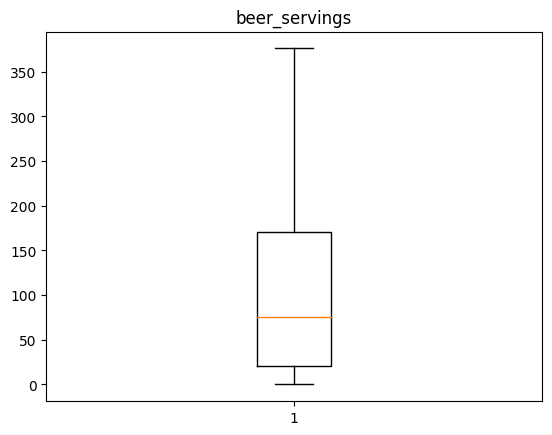

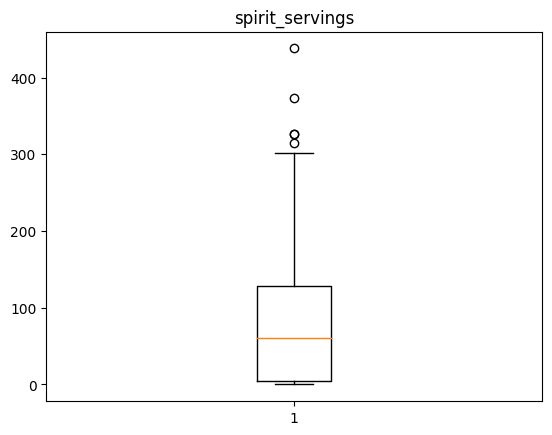

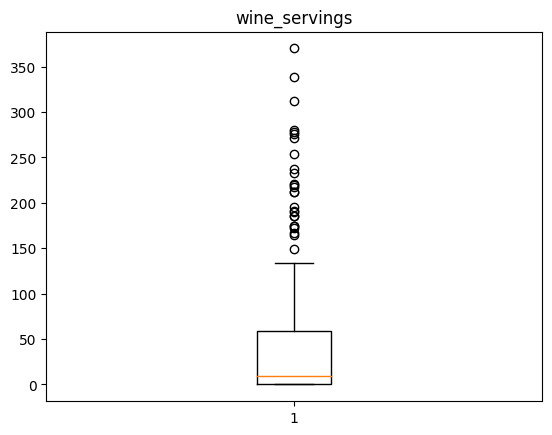

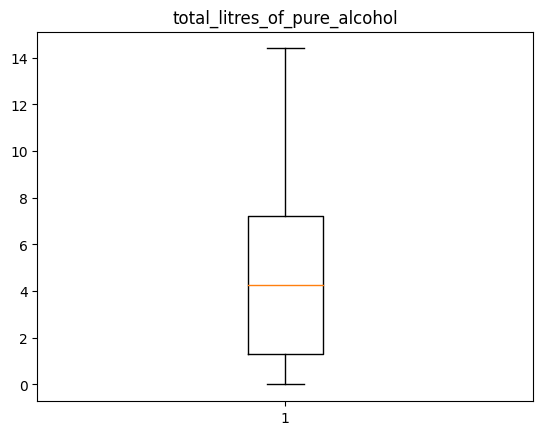

In [ ]:
for i in ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)
  

In [ ]:
Q1 = np.percentile(data['spirit_servings'], 25,interpolation = 'midpoint')
Q2 = np.percentile(data['spirit_servings'], 50,interpolation = 'midpoint')
Q3 = np.percentile(data['spirit_servings'], 75,interpolation = 'midpoint')

<ipython-input-178-b25f93b31c4a>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['spirit_servings'], 25,interpolation = 'midpoint')
<ipython-input-178-b25f93b31c4a>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['spirit_servings'], 50,interpolation = 'midpoint')
<ipython-input-178-b25f93b31c4a>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated Num

In [ ]:
print(Q1)
print(Q2)
print(Q3)

5.0
60.0
128.0


In [ ]:
data['spirit_servings'].median()

60.0

In [ ]:
IQR = Q3 - Q1

In [ ]:
low_lim = Q1 -1.5 * IQR
up_lim = Q3 + 1.5 * IQR


In [ ]:
low_lim 

-179.5

In [ ]:
up_lim

312.5

In [ ]:
outlier =[]
for x in data['spirit_servings']:
  if((x>up_lim) or (x<low_lim)):
    outlier.append(x)

In [ ]:
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [ ]:
ind1 = data['spirit_servings']<low_lim
data.loc[ind1].index

Int64Index([], dtype='int64')

In [ ]:
ind2 = data['spirit_servings']>up_lim
data.loc[ind2].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [ ]:
data.drop([15,68,73,141,144], inplace=True)

In [ ]:
Q1 = np.percentile(data['wine_servings'], 25,interpolation = 'midpoint')
Q2 = np.percentile(data['wine_servings'], 50,interpolation = 'midpoint')
Q3 = np.percentile(data['wine_servings'], 75,interpolation = 'midpoint')

<ipython-input-190-e0baee37af85>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['wine_servings'], 25,interpolation = 'midpoint')
<ipython-input-190-e0baee37af85>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['wine_servings'], 50,interpolation = 'midpoint')
<ipython-input-190-e0baee37af85>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1

In [ ]:
print(Q1)
print(Q2)
print(Q3)

1.0
9.0
57.5


In [ ]:
data['wine_servings'].median()

9.0

In [ ]:
IQR = Q3 - Q1

In [ ]:
low_lim = Q1 -1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [ ]:
low_lim

-83.75

In [ ]:
up_lim

142.25

In [ ]:
outlier =[]
for x in data['wine_servings']:
  if((x>up_lim) or (x<low_lim)):
    outlier.append(x)

In [ ]:
outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [ ]:
ind1 = data['wine_servings']<low_lim
data.loc[ind1].index

Int64Index([], dtype='int64')

In [ ]:
ind2 = data['wine_servings']>up_lim
data.loc[ind2].index

Int64Index([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],
           dtype='int64')

In [ ]:
data.drop([3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185], inplace=True)

In [ ]:
Q1 = np.percentile(data['beer_servings'], 25,interpolation = 'midpoint')
Q2 = np.percentile(data['beer_servings'], 50,interpolation = 'midpoint')
Q3 = np.percentile(data['beer_servings'], 75,interpolation = 'midpoint')

<ipython-input-202-4105b1ff7476>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['beer_servings'], 25,interpolation = 'midpoint')
<ipython-input-202-4105b1ff7476>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['beer_servings'], 50,interpolation = 'midpoint')
<ipython-input-202-4105b1ff7476>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1

In [ ]:
print(Q1)
print(Q2)
print(Q3)

17.5
54.5
126.0


In [ ]:
data['beer_servings'].median()

54.5

In [ ]:
IQR = Q3 - Q1

In [ ]:
low_lim = Q1 -1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [ ]:
low_lim

-145.25

In [ ]:
up_lim

288.75

In [ ]:
utlier =[]
for x in data['beer_servings']:
  if((x>up_lim) or (x<low_lim)):
    outlier.append(x)

In [ ]:
outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0,
 361.0,
 347.0,
 343.0,
 376.0,
 306.0,
 343.0]

In [ ]:
ind1 = data['beer_servings']<low_lim
data.loc[ind1].index

Int64Index([], dtype='int64')

# **GRAPH**

In [ ]:
ind1 = data['wine_servings']<low_lim
data.loc[ind1].index

Int64Index([], dtype='int64')

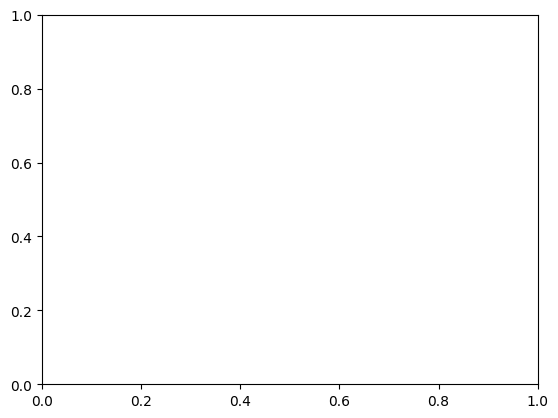

In [ ]:
plt.subplot()
plt.show()

In [ ]:
data = pd.read_csv('/content/medals_by_country_2016 (1).csv')

In [ ]:
data.head()

,Unnamed: 0,Bronze,Gold,Silver
0,United States,67,137,52
1,Germany,67,47,43
2,Great Britain,26,64,55
3,Russia,35,50,28
4,China,35,44,30


In [ ]:
data=data.rename(columns={'Unnamed: 0':'Country'})

In [ ]:
data.head()

,Country,Bronze,Gold,Silver
0,United States,67,137,52
1,Germany,67,47,43
2,Great Britain,26,64,55
3,Russia,35,50,28
4,China,35,44,30


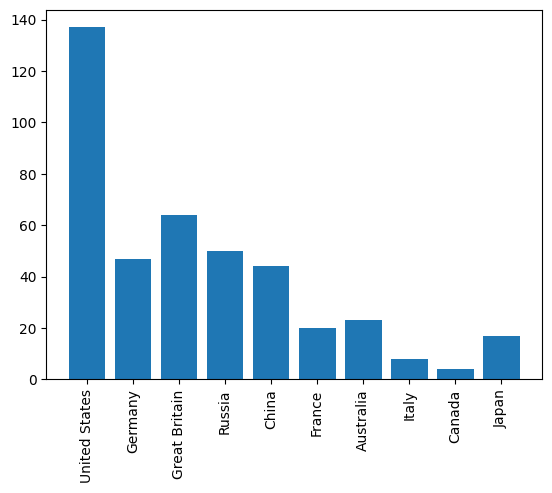

In [ ]:
plt.bar(data['Country'],data['Gold'])
plt.xticks(rotation=90)
plt.show()

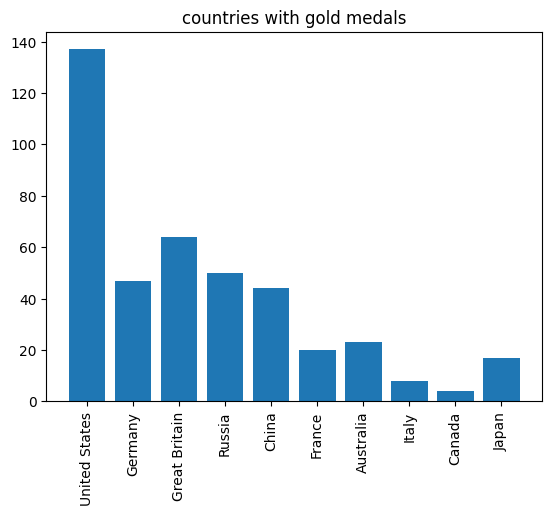

In [ ]:
plt.bar(data['Country'],data['Gold'])
plt.title('countries with gold medals')
plt.xticks(rotation=90)
plt.show()

<Axes: >

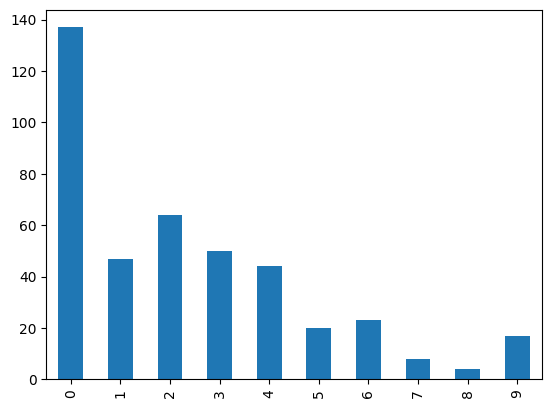

In [ ]:
data['Gold'].plot.bar()

In [ ]:
data = data.set_index('Country') #making country as index

In [ ]:
data.head()

,Bronze,Gold,Silver
Country,,,
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


<Axes: xlabel='Country'>

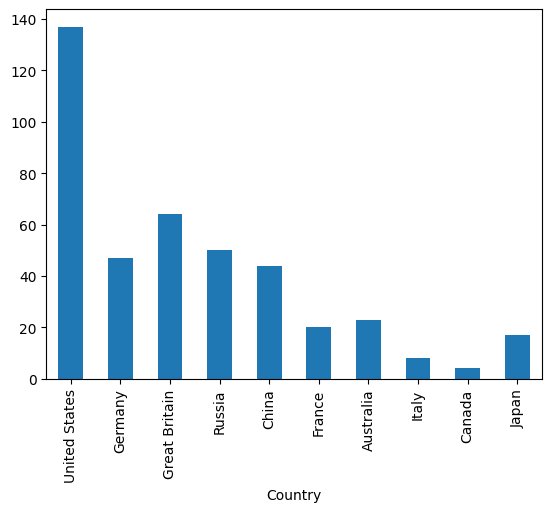

In [ ]:
data['Gold'].plot.bar()

In [ ]:
data['Gold'].sort_values(ascending=False)

Country
United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Australia         23
France            20
Japan             17
Italy              8
Canada             4
Name: Gold, dtype: int64

pie chart

In [ ]:
countries = ['Ind','USA','UK','UAE']
pop = [123, 20, 30, 40]

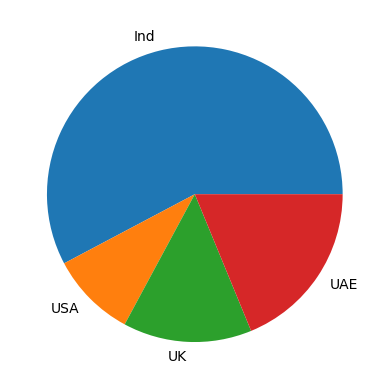

In [ ]:
plt.pie(pop, labels=countries)
plt.show()